In [1]:
import os
cwd = os.getcwd().replace('/research', '')
os.chdir(cwd)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


In [3]:
dataset = pd.read_csv('data/dataset_5m_180day_tickers.csv' , index_col=0)
dataset.index = pd.to_datetime(dataset.index)

In [4]:
data = dataset.copy()
data.groupby('symbol')\
    .apply(lambda x: x.tail(2))

open        high         low       close  \
symbol    time                                                                  
ADAUSDT   2022-04-30 11:15:00      0.8068      0.8080      0.8068      0.8078   
          2022-04-30 11:20:00      0.8077      0.8077      0.8072      0.8076   
ALGOUSDT  2022-04-30 11:20:00      0.6350      0.6357      0.6347      0.6349   
          2022-04-30 11:25:00      0.6349      0.6354      0.6343      0.6350   
ATOMUSDT  2022-04-30 11:20:00     19.0300     19.0700     19.0100     19.0600   
          2022-04-30 11:25:00     19.0700     19.0700     19.0300     19.0400   
BCHUSDT   2022-04-30 11:20:00    293.8000    293.8000    293.6000    293.7000   
          2022-04-30 11:25:00    293.6000    293.6000    293.3000    293.6000   
BNBUSDT   2022-04-30 11:15:00    397.3000    397.4000    397.1000    397.3000   
          2022-04-30 11:20:00    397.2000    397.3000    397.0000    397.0000   
BTCUSDT   2022-04-30 11:10:00  38580.4600  38610.4400  38580.4600  38606.8000   
          2022-04-30 11:15:00  38606.8100  38606.8100  38600.2800  38600.2900   
DOGEUSDT  2022-04-30 11:20:00      0.1352      0.1352      0.1350      0.1350   
          2022-04-30 11:25:00      0.1350      0.1350      0.1350      0.1350   
DOTUSDT   2022-04-30 11:15:00     16.0900     16.1000     16.0700     16.1000   
          2022-04-30 11:20:00     16.0900     16.1100     16.0800     16.1000   
ETCUSDT   2022-04-30 11:20:00     29.1100     29.1200     29.0600     29.0700   
          2022-04-30 11:25:00     29.0800     29.1000     29.0400     29.1000   
ETHUSDT   2022-04-30 11:10:00   2831.7000   2834.8300   2831.6900   2833.6600   
          2022-04-30 11:15:00   2833.6700   2834.0000   2832.6700   2833.8100   
FILUSDT   2022-04-30 11:25:00     17.8700     17.9000     17.7400     17.7700   
          2022-04-30 11:30:00     17.7600     17.7800     17.7600     17.7600   
LINKUSDT  2022-04-30 11:20:00     12.0700     12.0800     12.0600     12.0700   
          2022-04-30 11:25:00     12.0600     12.0700     12.0500     12.0700   
LTCUSDT   2022-04-30 11:10:00    100.2000    100.6000    100.2000    100.5000   
          2022-04-30 11:15:00    100.5000    100.6000    100.5000    100.5000   
LUNAUSDT  2022-04-30 11:15:00     84.2500     84.2600     84.1500     84.1500   
          2022-04-30 11:20:00     84.1600     84.2600     84.1000     84.2200   
MATICUSDT 2022-04-30 11:20:00      1.1450      1.1450      1.1430      1.1430   
          2022-04-30 11:25:00      1.1440      1.1440      1.1420      1.1430   
SOLUSDT   2022-04-30 11:15:00     94.0600     94.1000     94.0300     94.0300   
          2022-04-30 11:20:00     94.0300     94.0900     94.0000     94.0400   
XLMUSDT   2022-04-30 11:25:00      0.1811      0.1812      0.1809      0.1811   
          2022-04-30 11:30:00      0.1812      0.1812      0.1811      0.1811   
XRPUSDT   2022-04-30 11:15:00      0.6212      0.6246      0.6211      0.6237   
          2022-04-30 11:20:00      0.6237      0.6237      0.6222      0.6222   

                                     volume     symbol  
symbol    time                                          
ADAUSDT   2022-04-30 11:15:00  1.264940e+05    ADAUSDT  
          2022-04-30 11:20:00  1.781950e+04    ADAUSDT  
ALGOUSDT  2022-04-30 11:20:00  2.608000e+04   ALGOUSDT  
          2022-04-30 11:25:00  4.102200e+04   ALGOUSDT  
ATOMUSDT  2022-04-30 11:20:00  1.013486e+04   ATOMUSDT  
          2022-04-30 11:25:00  2.657150e+03   ATOMUSDT  
BCHUSDT   2022-04-30 11:20:00  3.629400e+01    BCHUSDT  
          2022-04-30 11:25:00  6.946200e+01    BCHUSDT  
BNBUSDT   2022-04-30 11:15:00  8.672380e+02    BNBUSDT  
          2022-04-30 11:20:00  1.506520e+02    BNBUSDT  
BTCUSDT   2022-04-30 11:10:00  7.129201e+01    BTCUSDT  
          2022-04-30 11:15:00  2.260659e+01    BTCUSDT  
DOGEUSDT  2022-04-30 11:20:00  1.005086e+06   DOGEUSDT  
          2022-04-30 11:25:00  2.803100e+04   DOGEUSDT  
DOTUSDT   2022-04-30 11:15:00  1.198305e+04   

In [5]:
for i in range(1, 11):
    data[f'target_{i}'] = data.groupby('symbol')['close'].shift(-i)
    data[f'target_pct_{i}'] = data[f'target_{i}'] / data['close'] - 1

    data[f'lag_{i}'] = data.groupby('symbol')['close'].shift(i)
    data[f'lag_pct_{i}'] = data.groupby('symbol')['close'].pct_change().shift(i)

data['minutes'] = data.index.minute
data['hours'] = data.index.hour
data['weekday'] = data.index.weekday
data['month'] = data.index.month
data['dayOfYear'] = data.index.dayofyear


data = data.sort_values(['time'])
print(data.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'symbol', 'target_1',
       'target_pct_1', 'lag_1', 'lag_pct_1', 'target_2', 'target_pct_2',
       'lag_2', 'lag_pct_2', 'target_3', 'target_pct_3', 'lag_3', 'lag_pct_3',
       'target_4', 'target_pct_4', 'lag_4', 'lag_pct_4', 'target_5',
       'target_pct_5', 'lag_5', 'lag_pct_5', 'target_6', 'target_pct_6',
       'lag_6', 'lag_pct_6', 'target_7', 'target_pct_7', 'lag_7', 'lag_pct_7',
       'target_8', 'target_pct_8', 'lag_8', 'lag_pct_8', 'target_9',
       'target_pct_9', 'lag_9', 'lag_pct_9', 'target_10', 'target_pct_10',
       'lag_10', 'lag_pct_10', 'minutes', 'hours', 'weekday', 'month',
       'dayOfYear'],
      dtype='object')


## Cryptocurrency price chart

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

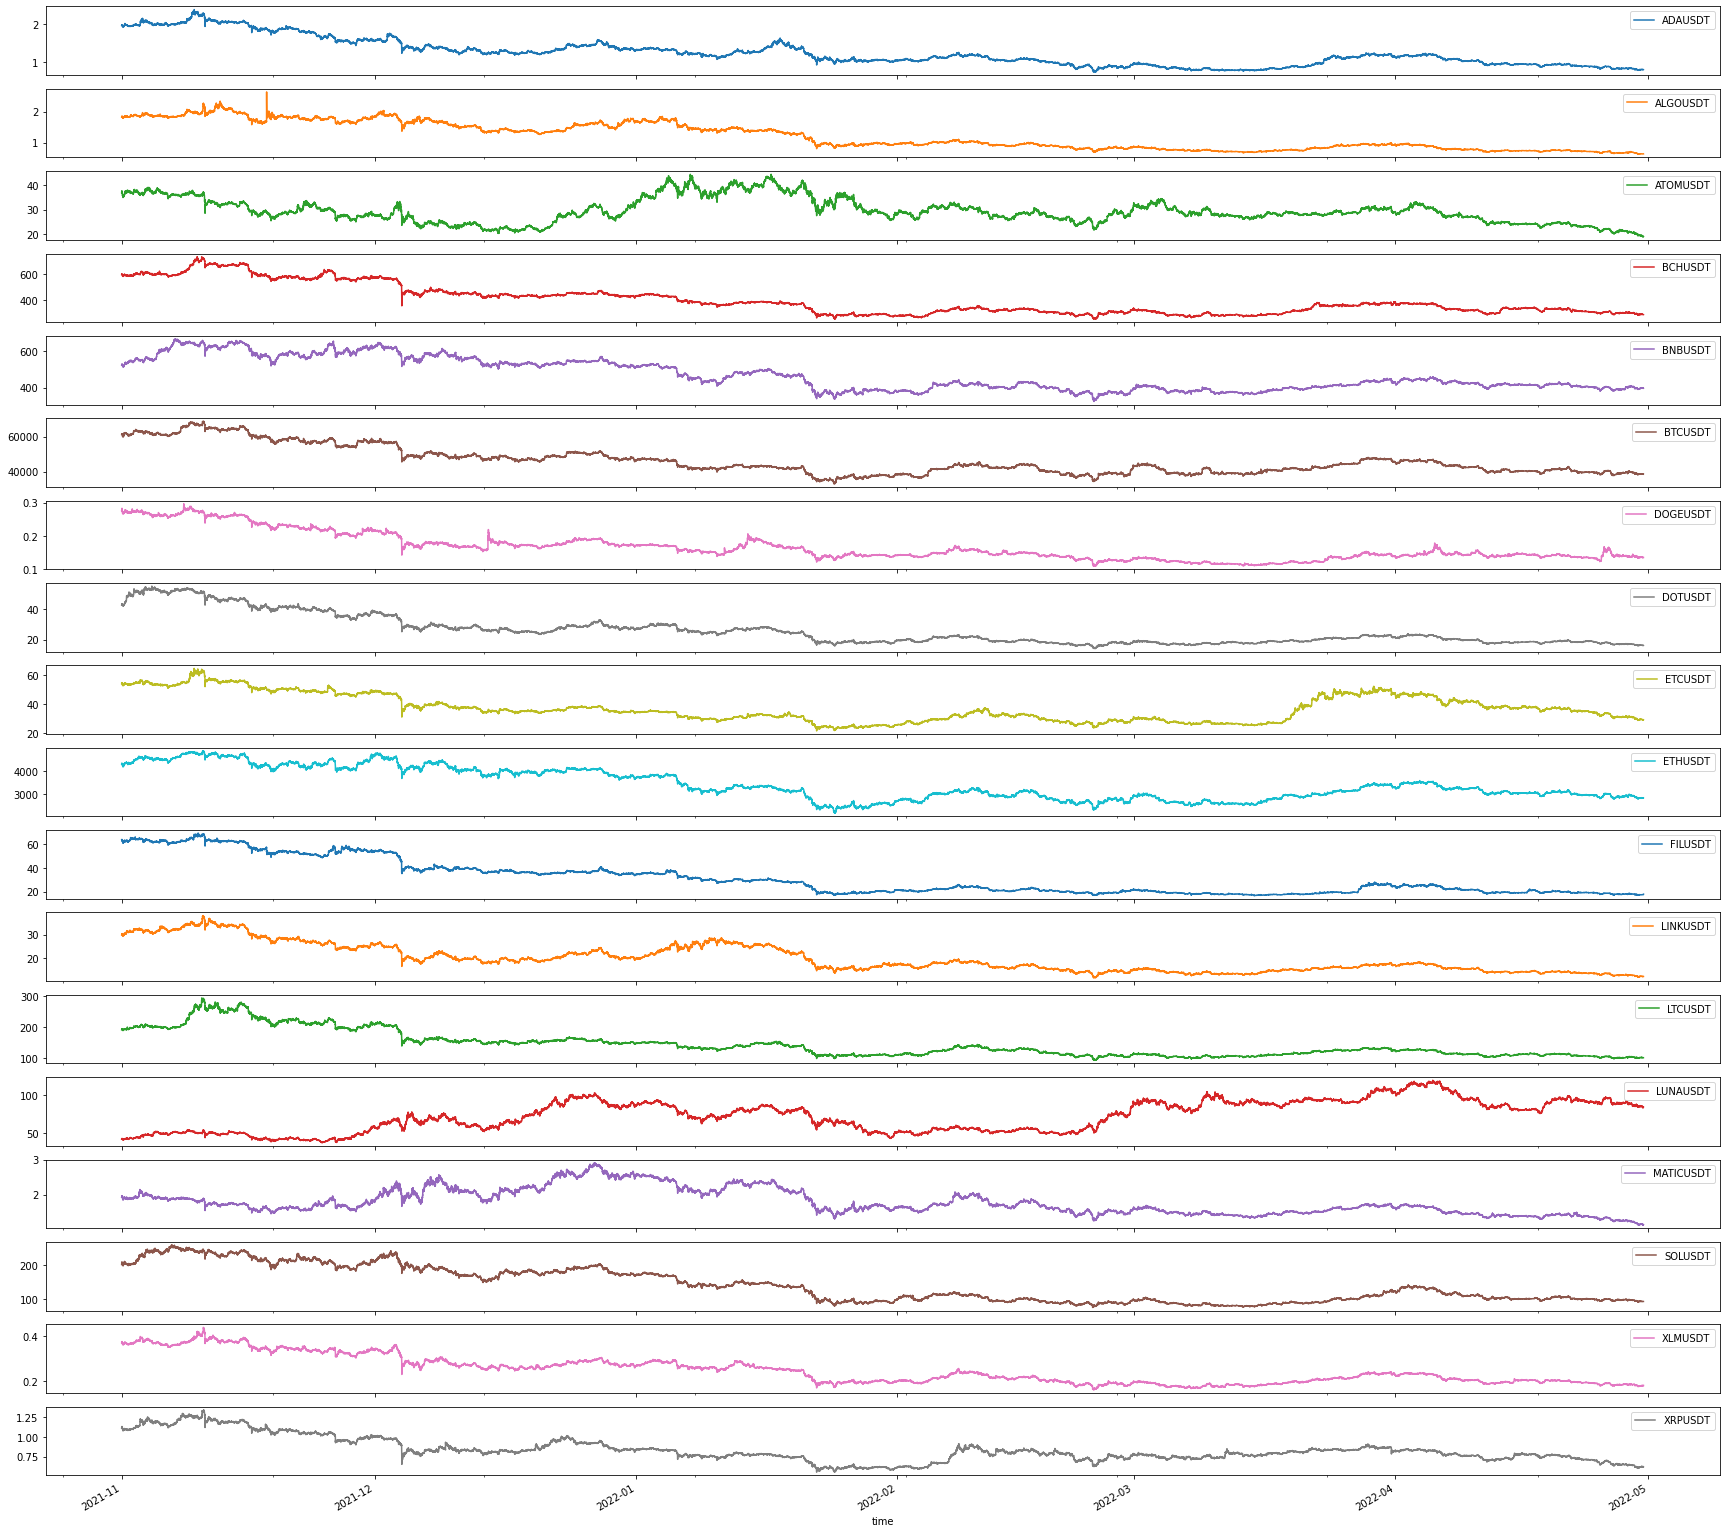

In [20]:
pd.pivot_table(data.reset_index(),
               index='time', columns='symbol', values='close'
               ).plot(figsize=(30, 30), subplots=True)

/tmp/ipykernel_10143/480728201.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('symbol')['close', 'target_9']\


symbol
ADAUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
ALGOUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
ATOMUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
BCHUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
BNBUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
BTCUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
DOGEUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
DOTUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
ETCUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
ETHUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
FILUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
LINKUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
LTCUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
LUNAUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
MATICUSDT    AxesSubplot(0.125,0.125;0.775x0.755)
SOLUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
XLMUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
XRPUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

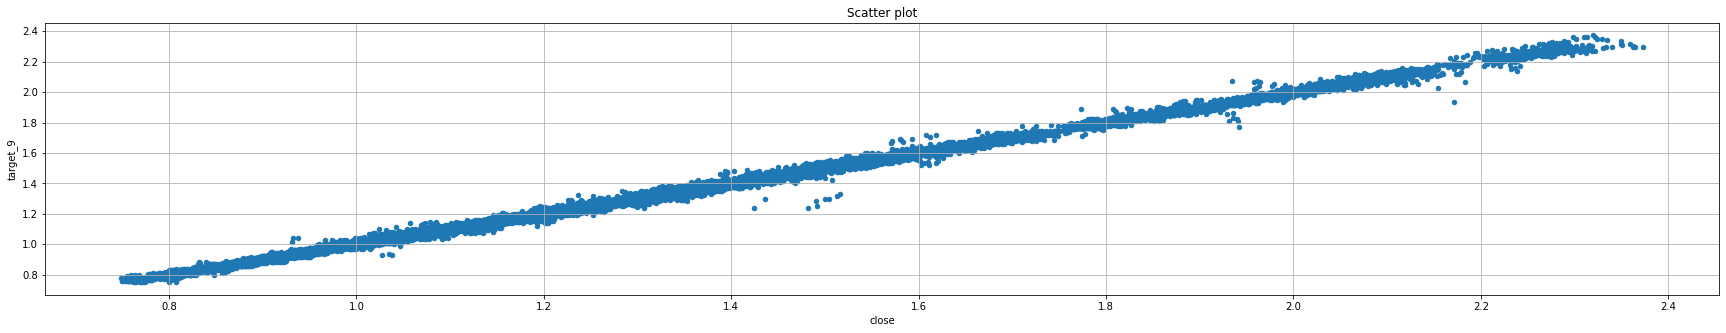

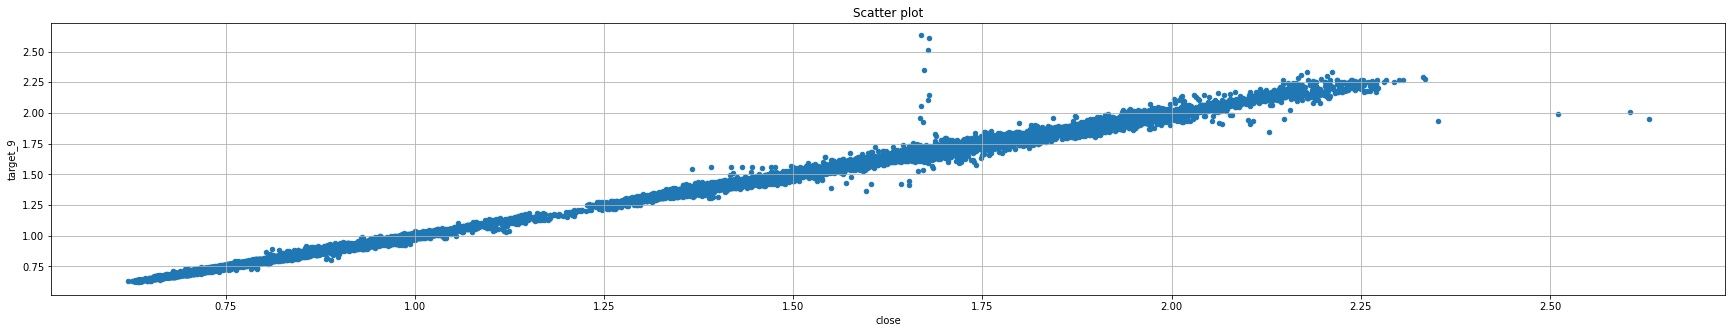

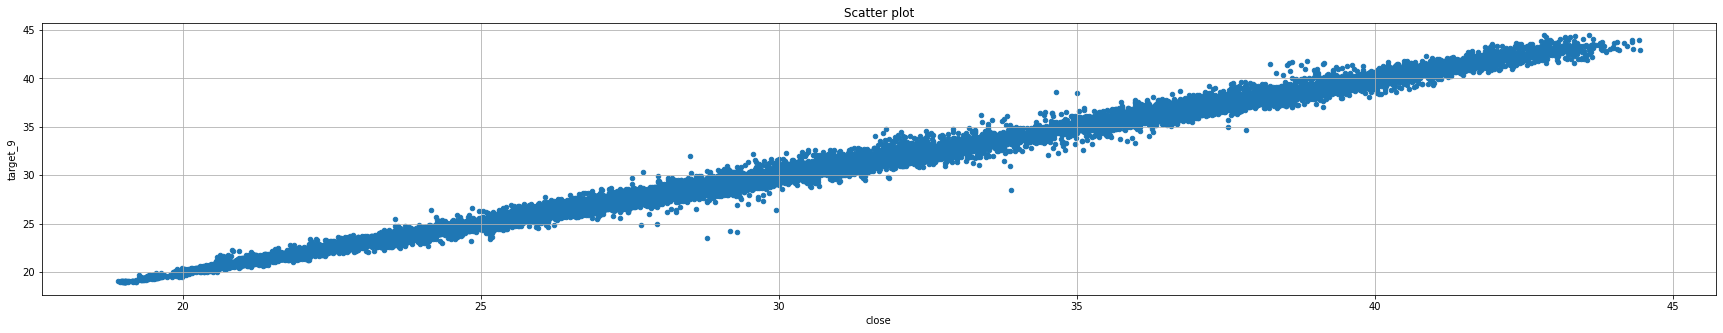

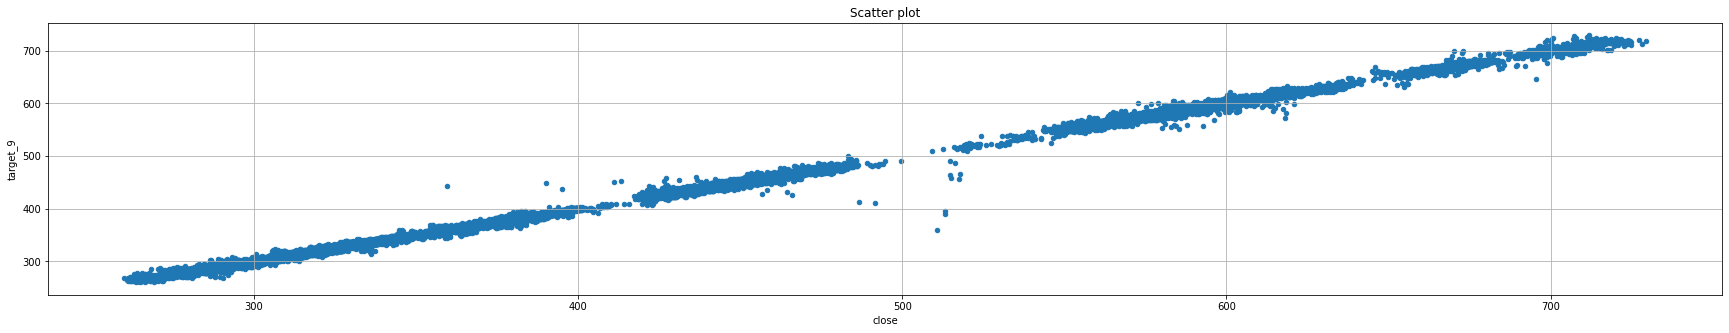

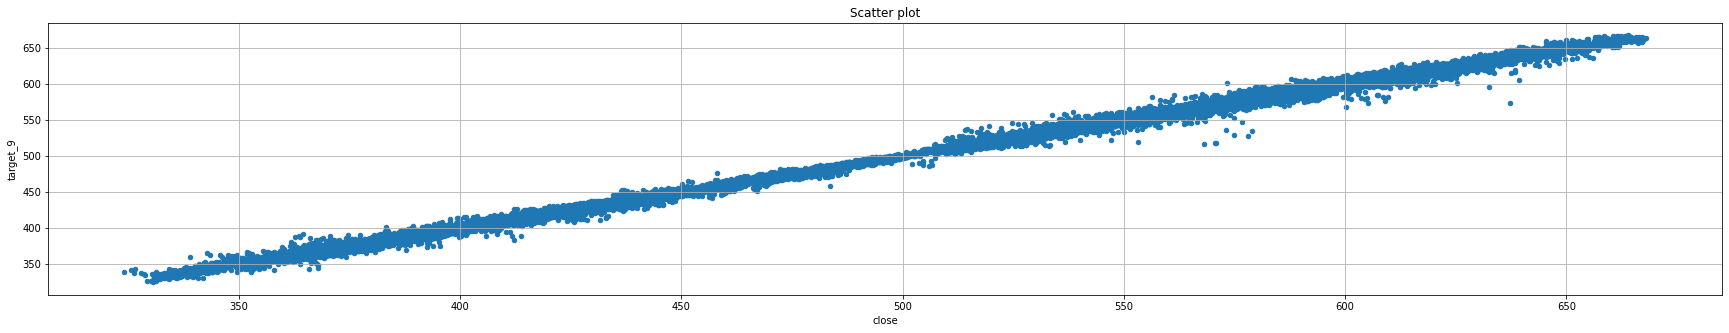

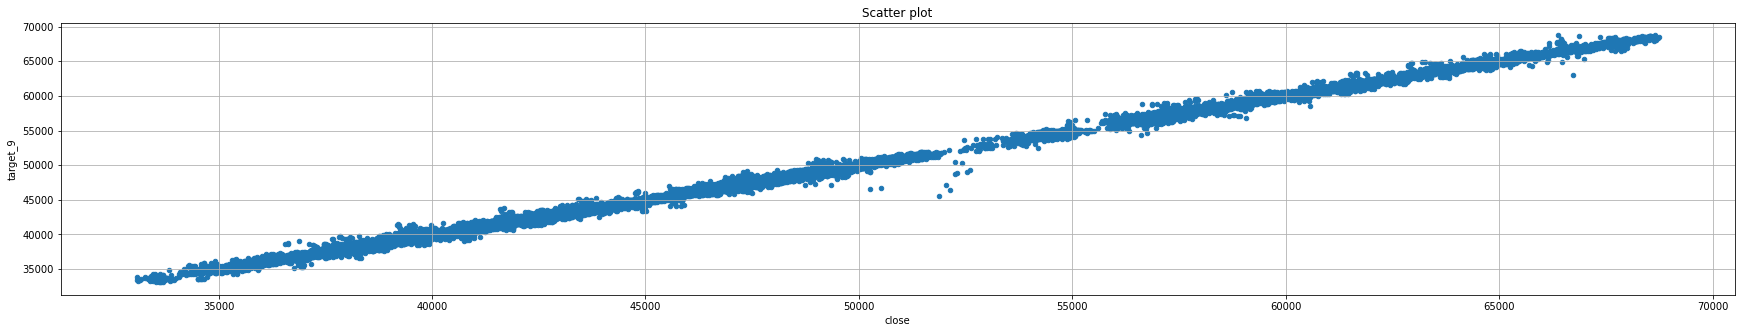

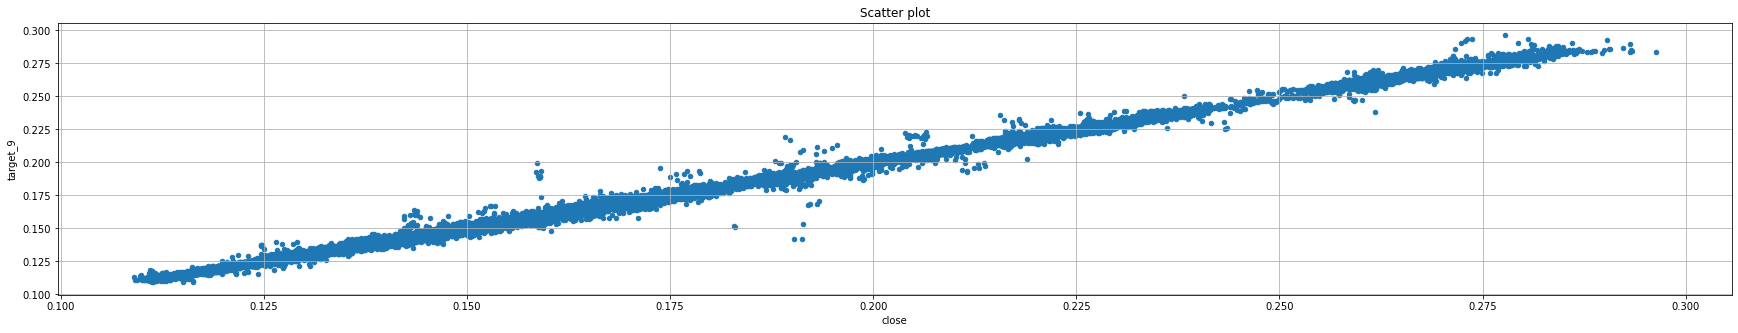

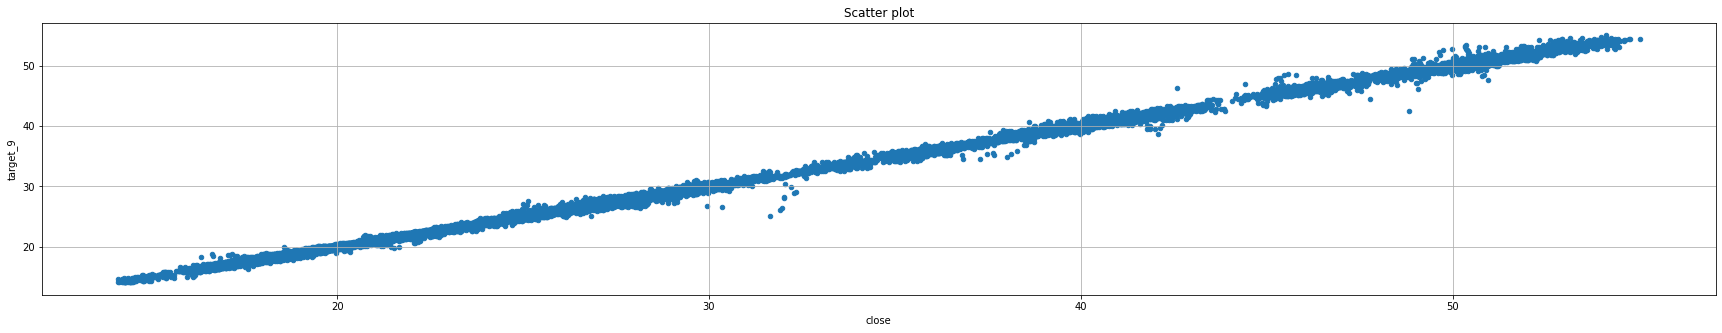

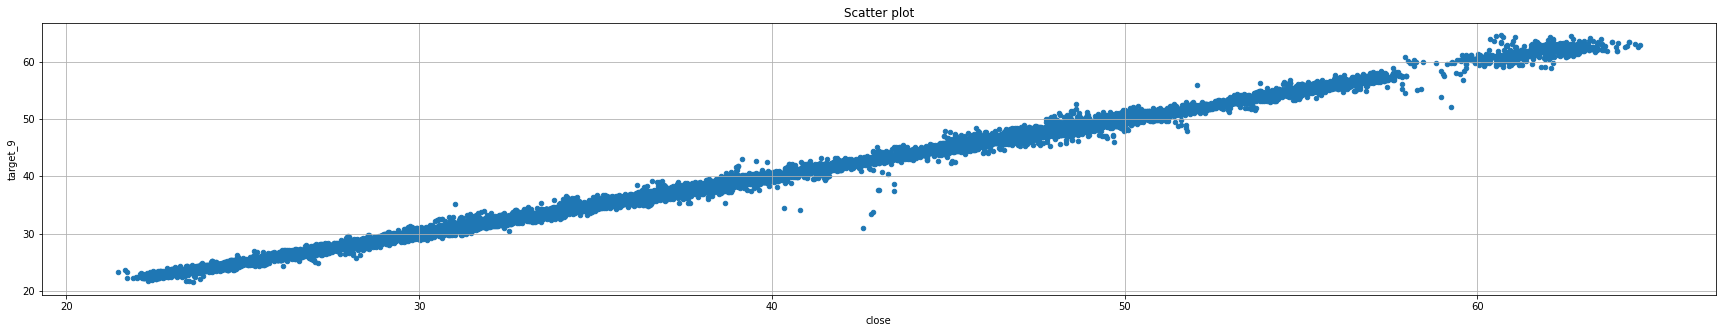

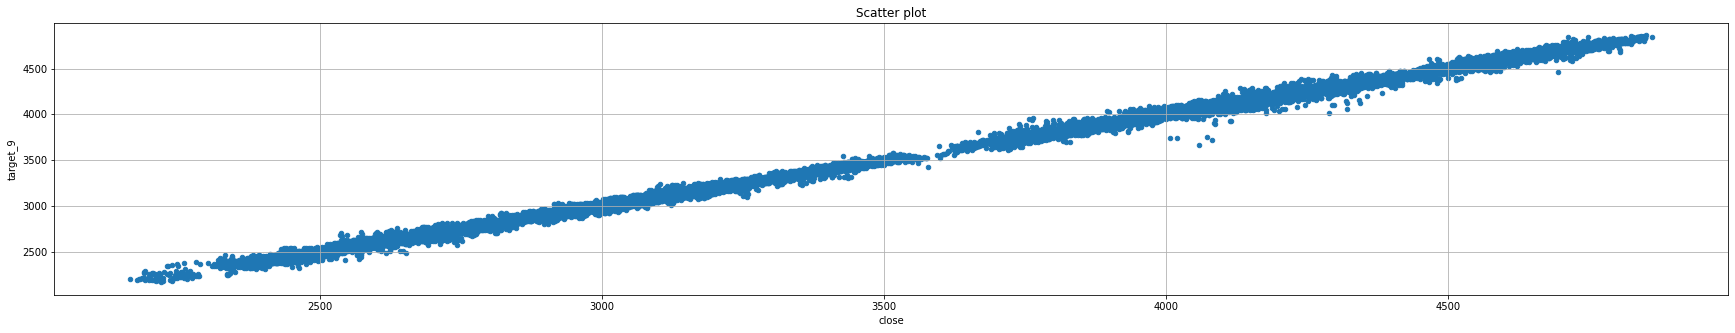

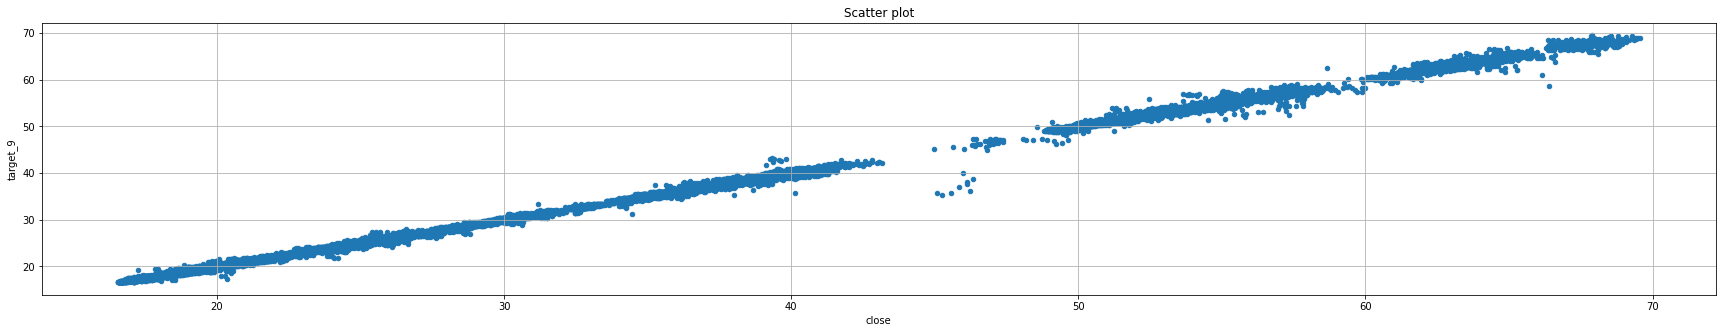

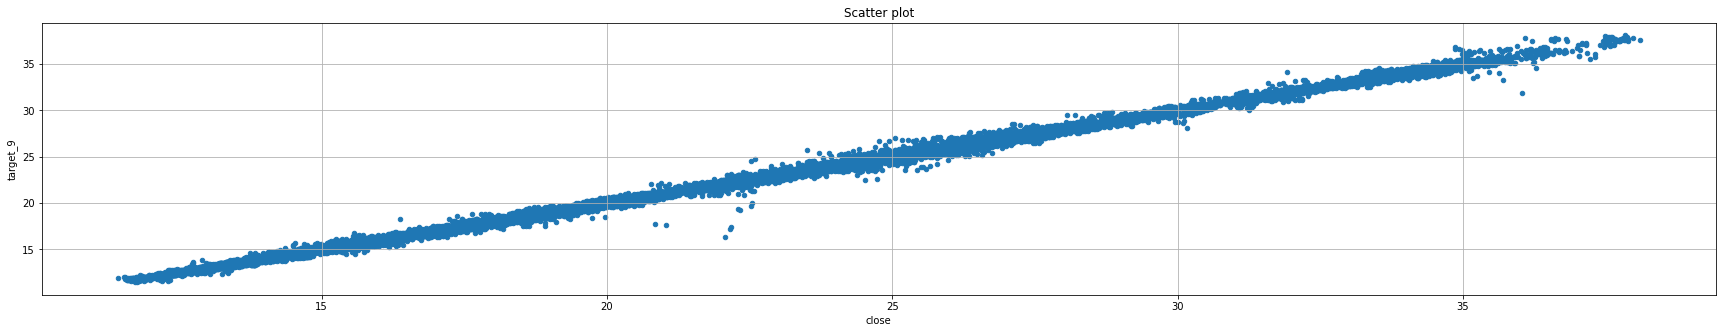

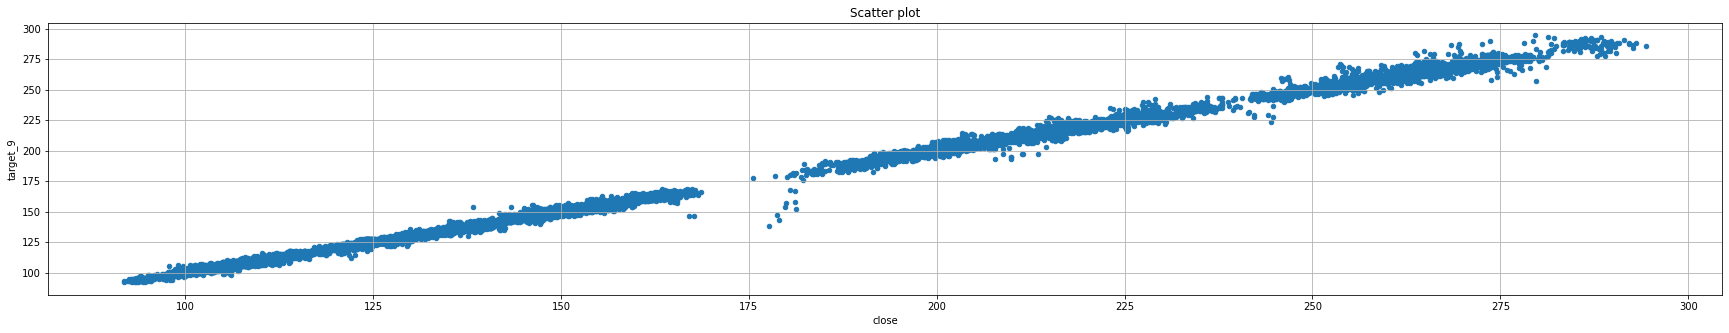

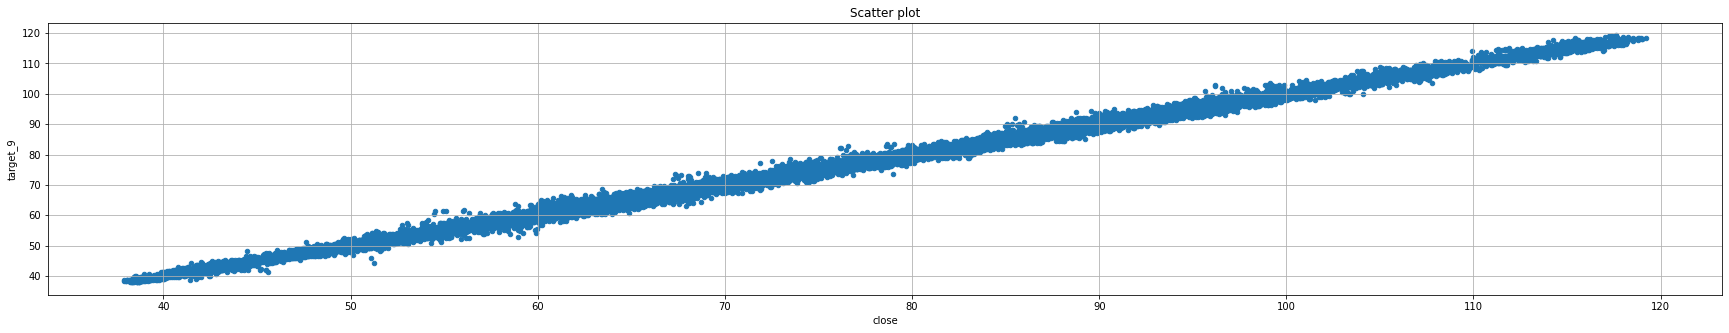

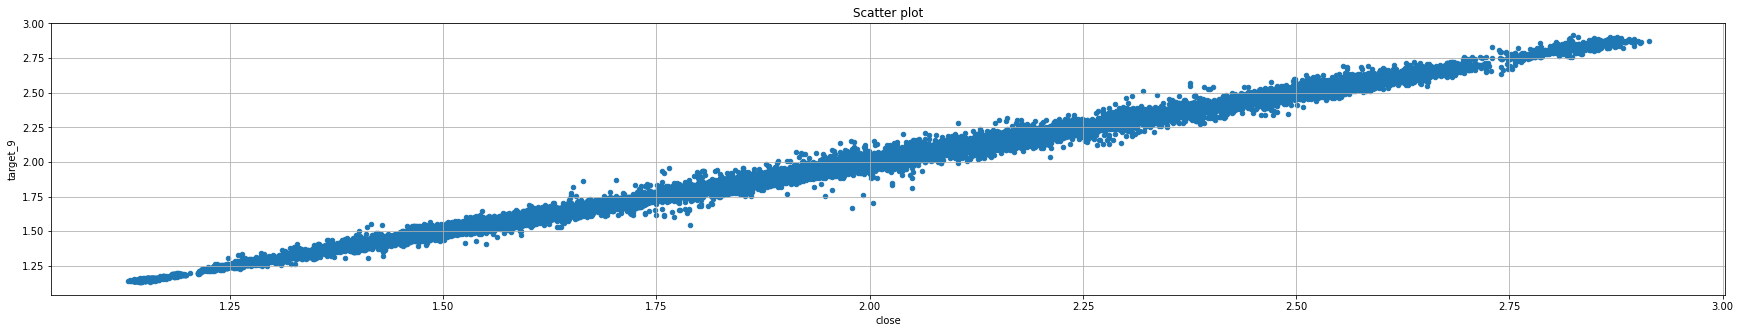

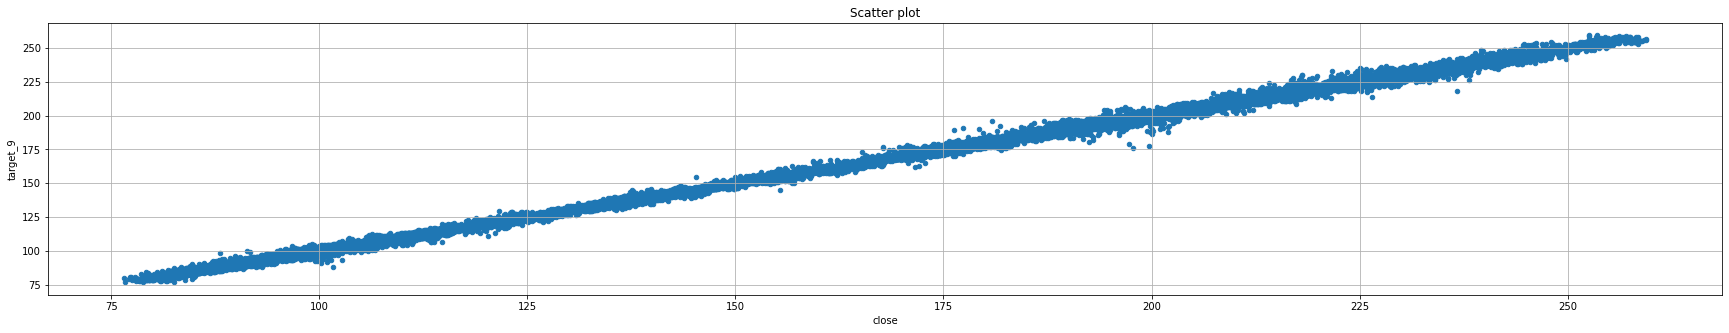

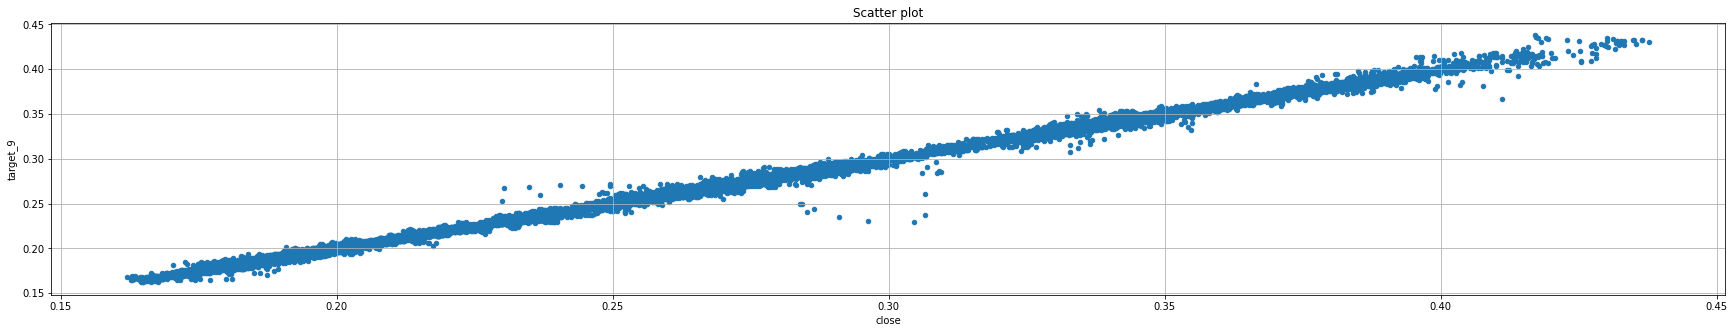

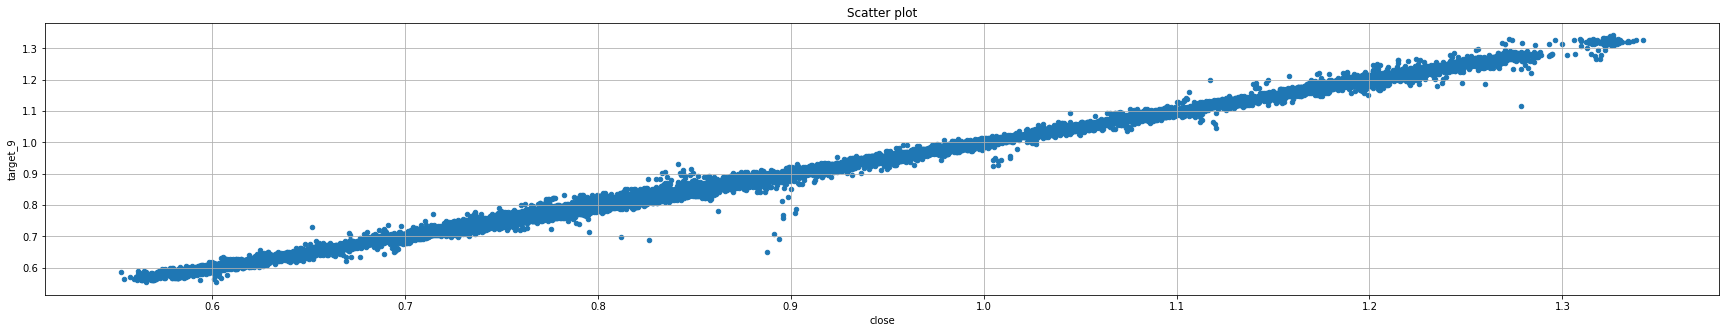

In [66]:
data.groupby('symbol')['close', 'target_9']\
    .plot.scatter(x='close', y='target_9', figsize=(30, 5), grid=True, legend=True, title='Scatter plot')

/tmp/ipykernel_10143/13613874.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('symbol')['close', 'target_1']\


symbol
ADAUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
ALGOUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
ATOMUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
BCHUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
BNBUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
BTCUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
DOGEUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
DOTUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
ETCUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
ETHUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
FILUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
LINKUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
LTCUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
LUNAUSDT     AxesSubplot(0.125,0.125;0.775x0.755)
MATICUSDT    AxesSubplot(0.125,0.125;0.775x0.755)
SOLUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
XLMUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
XRPUSDT      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

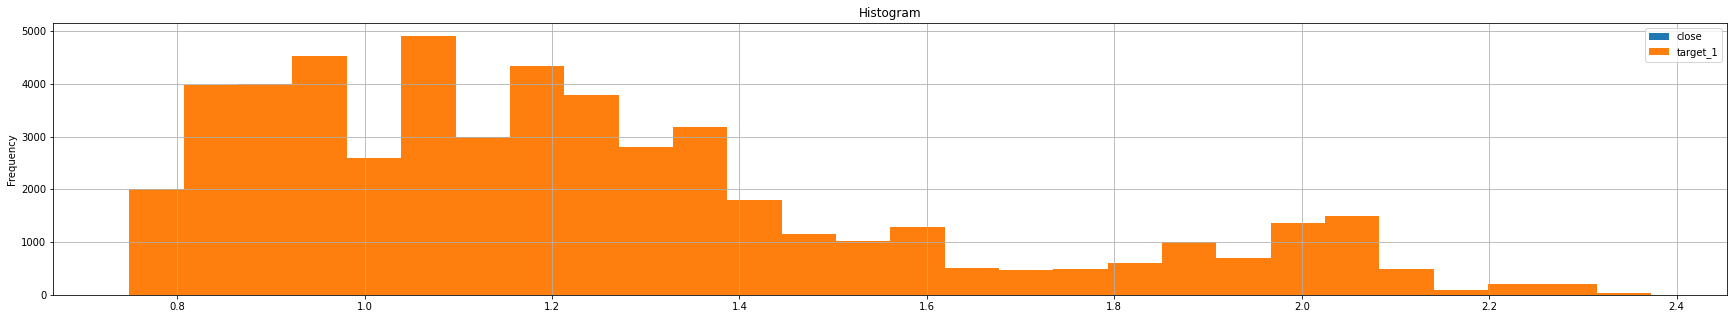

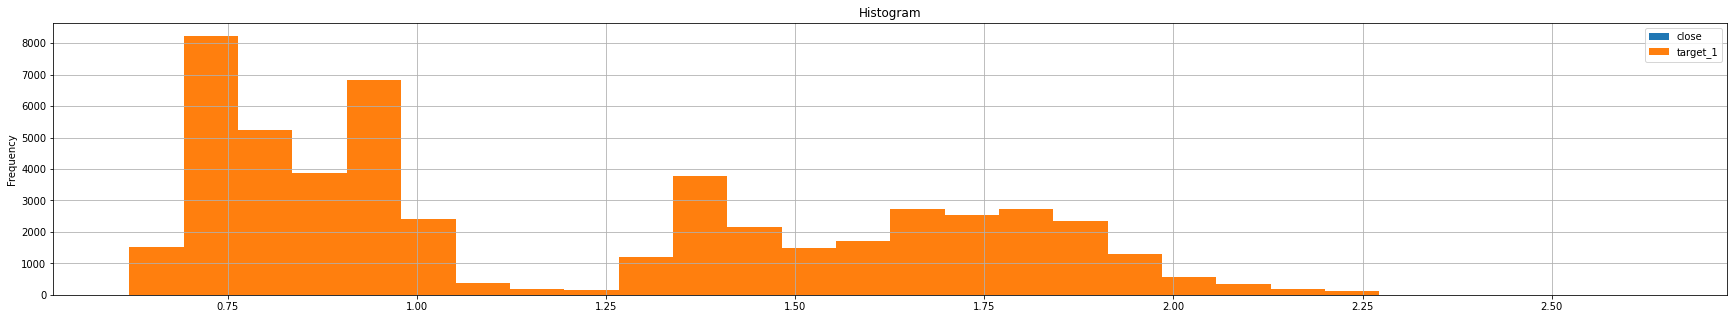

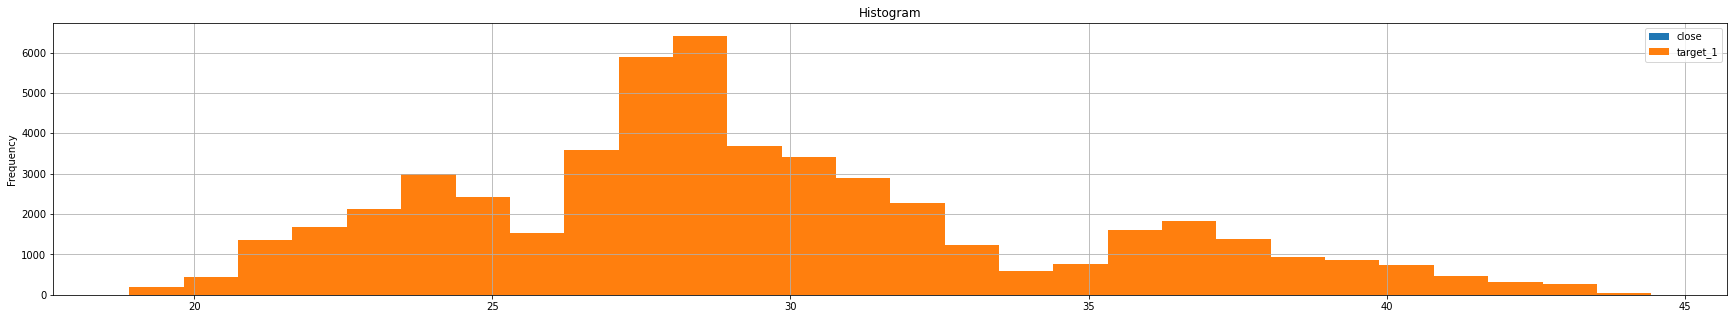

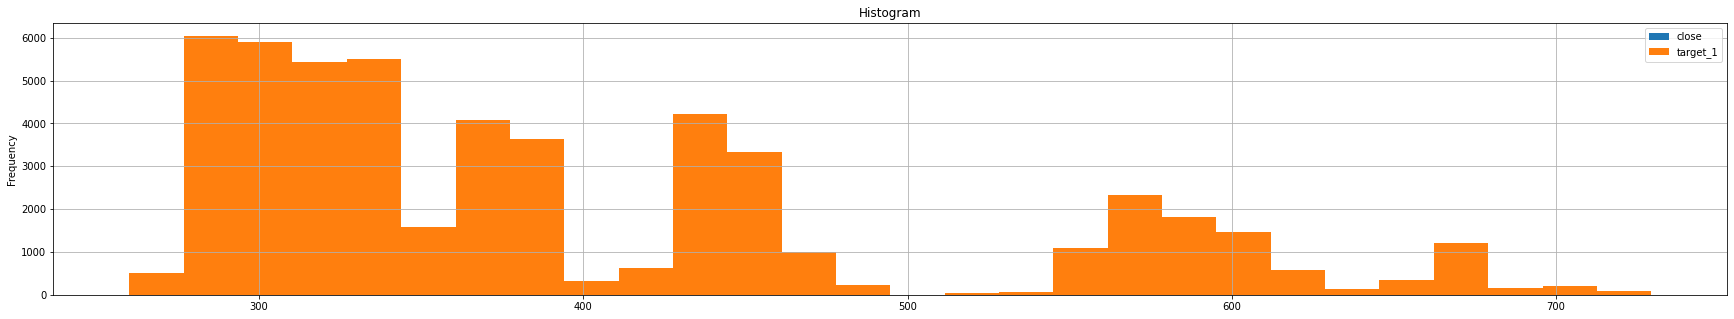

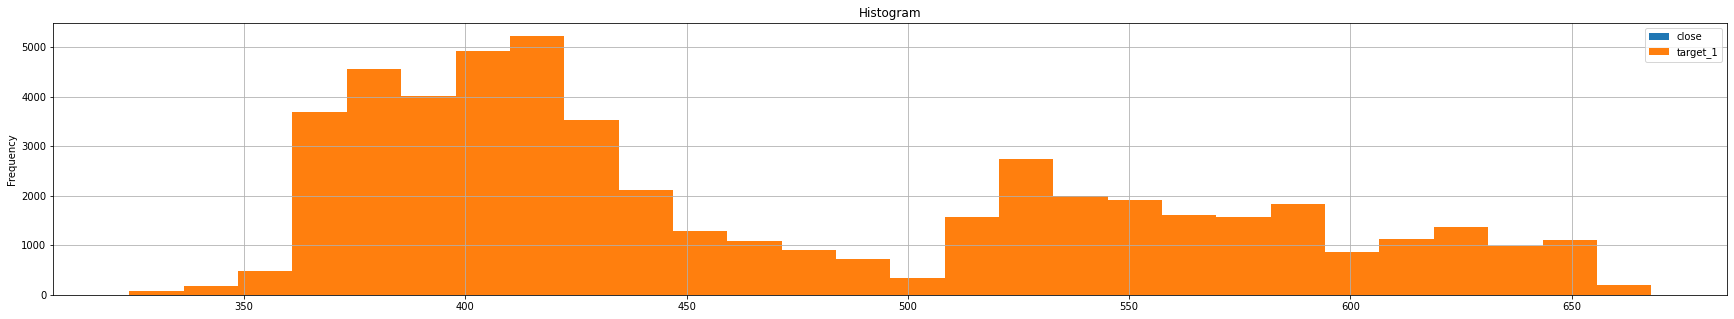

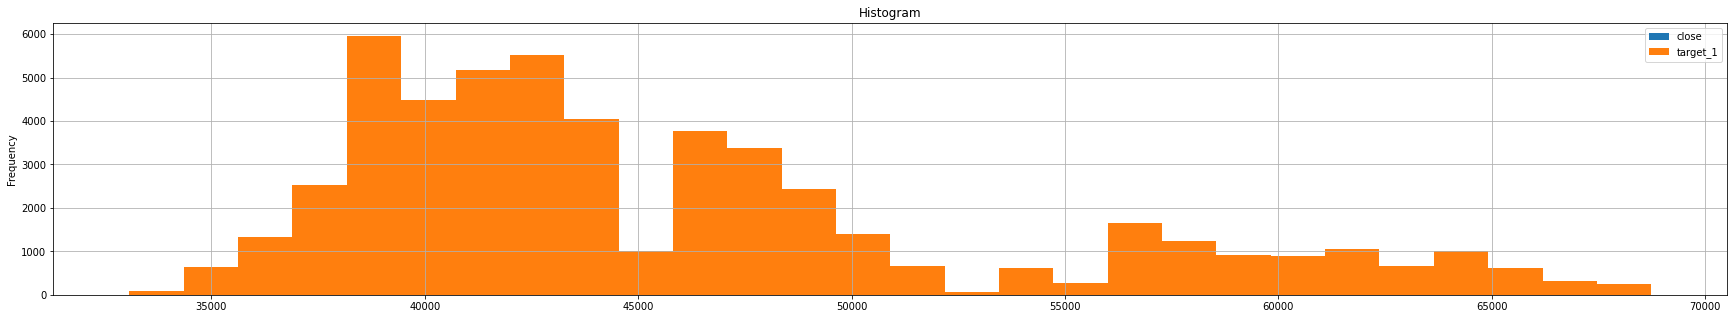

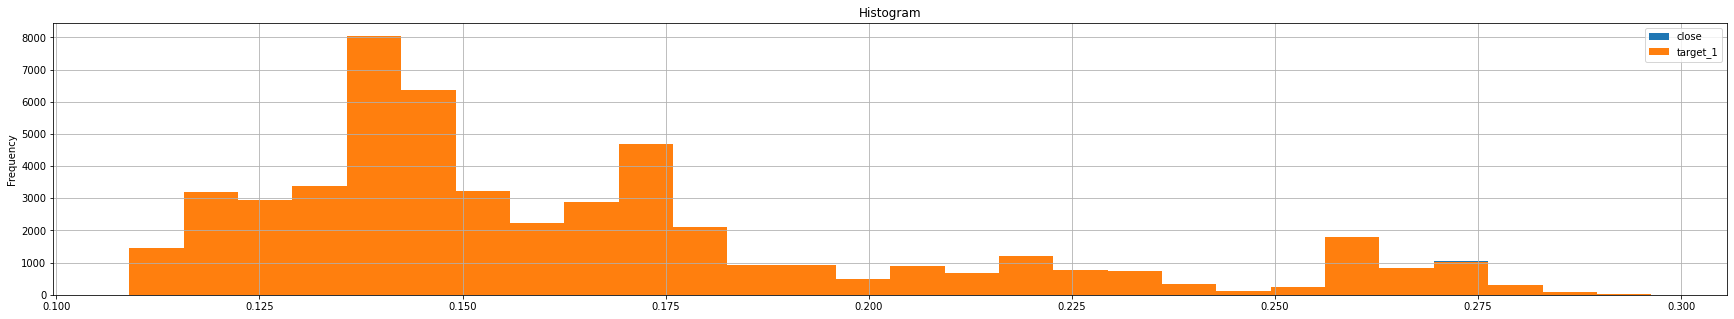

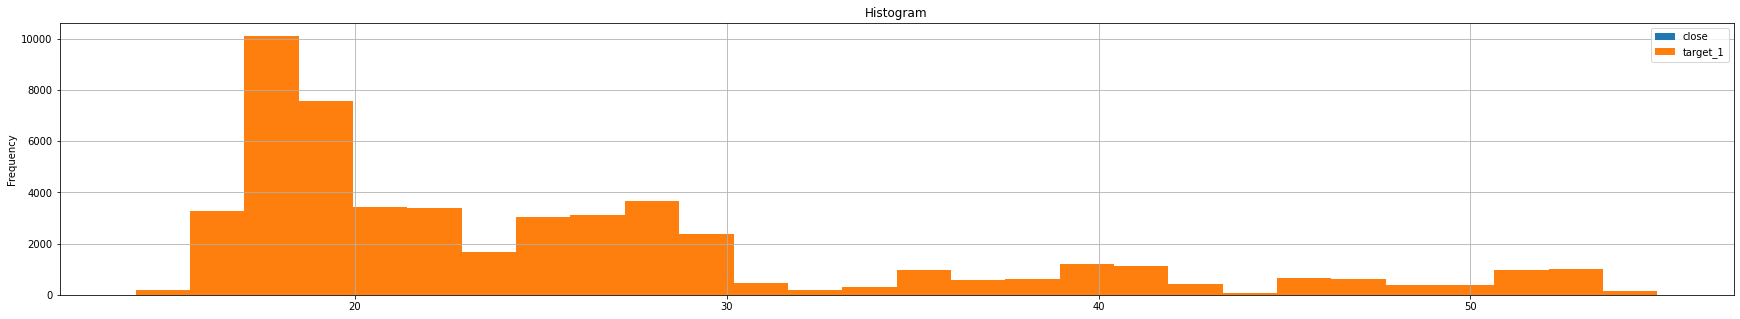

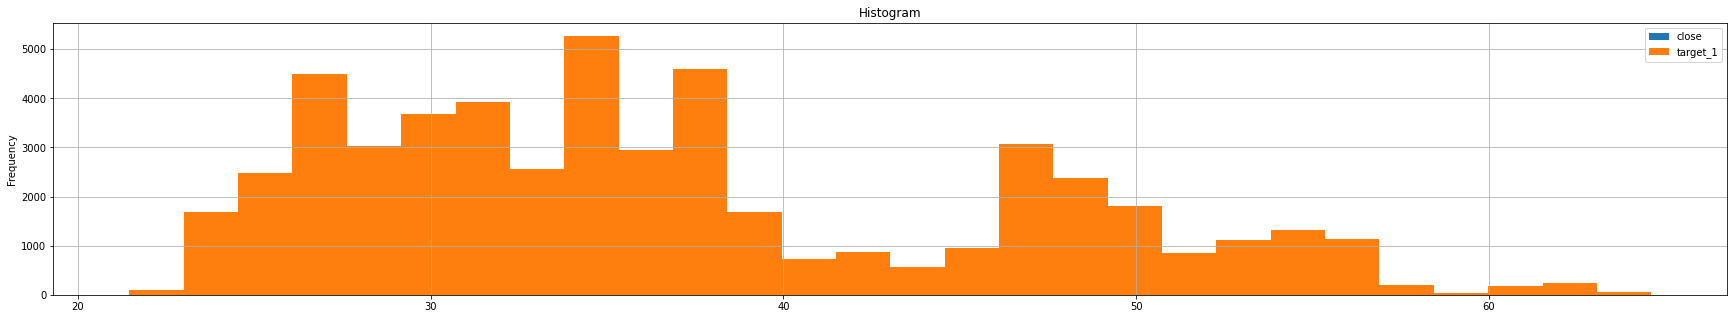

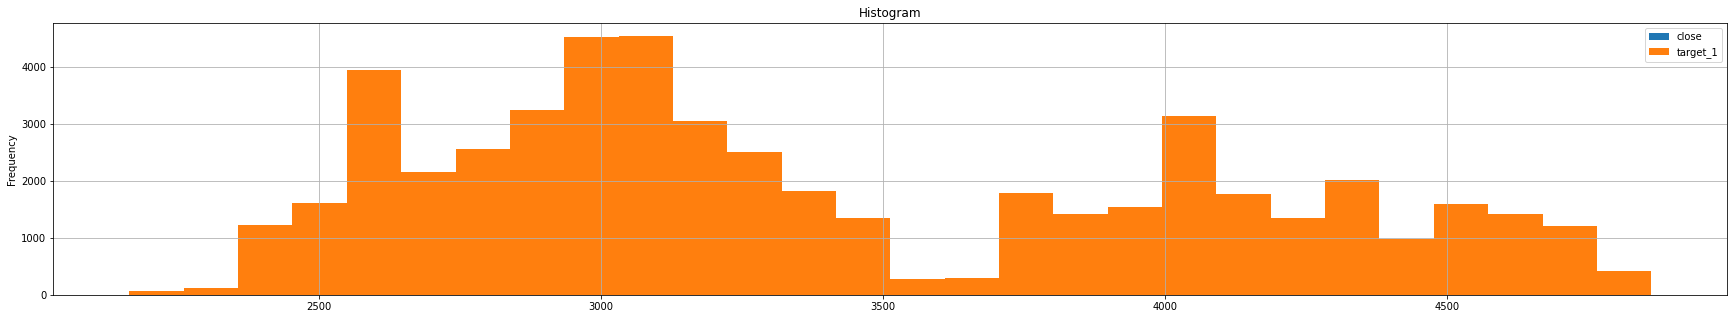

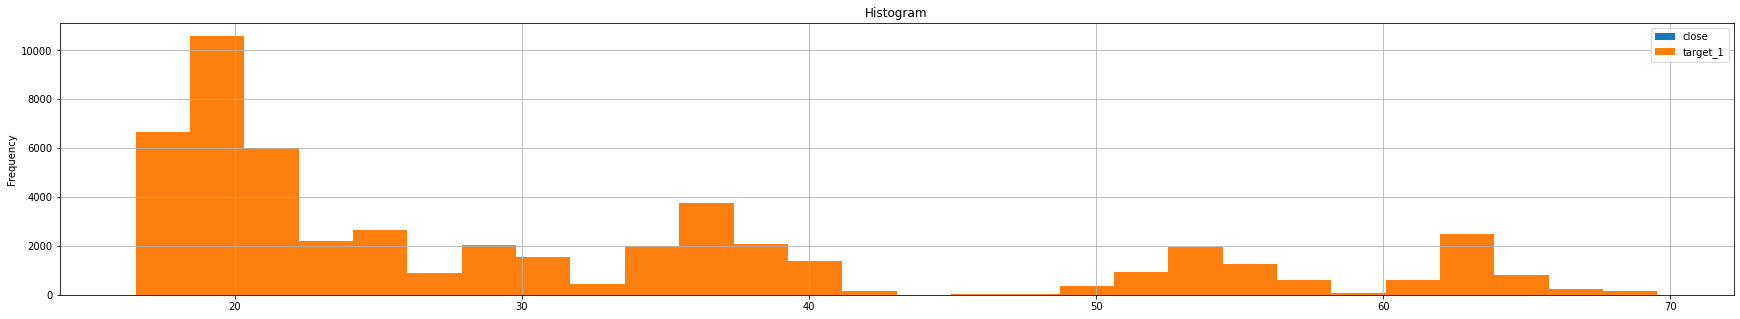

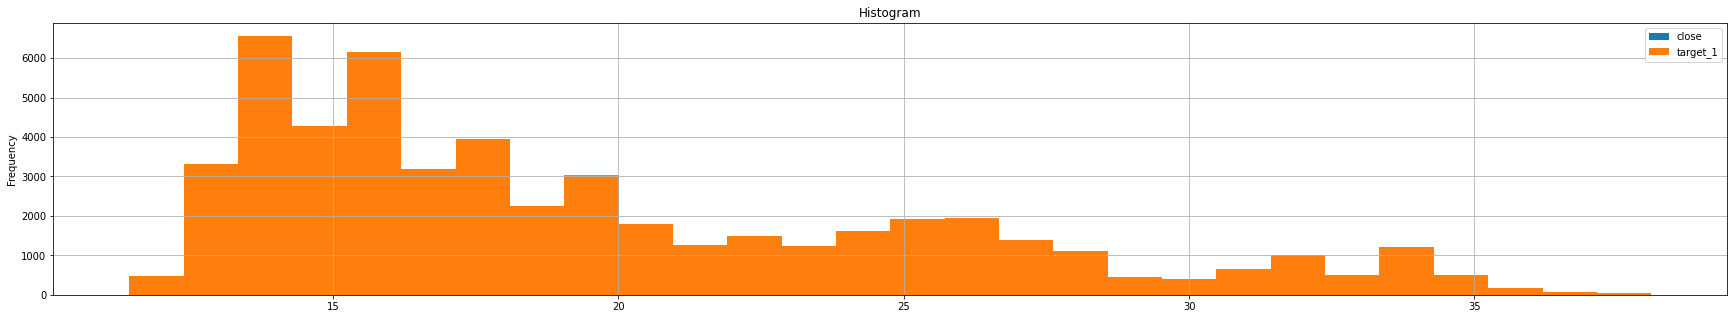

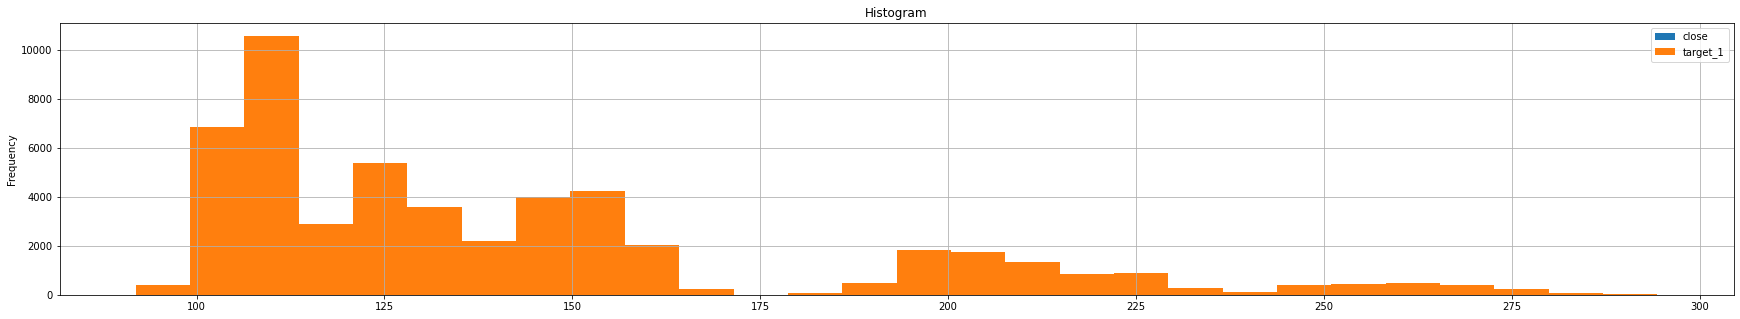

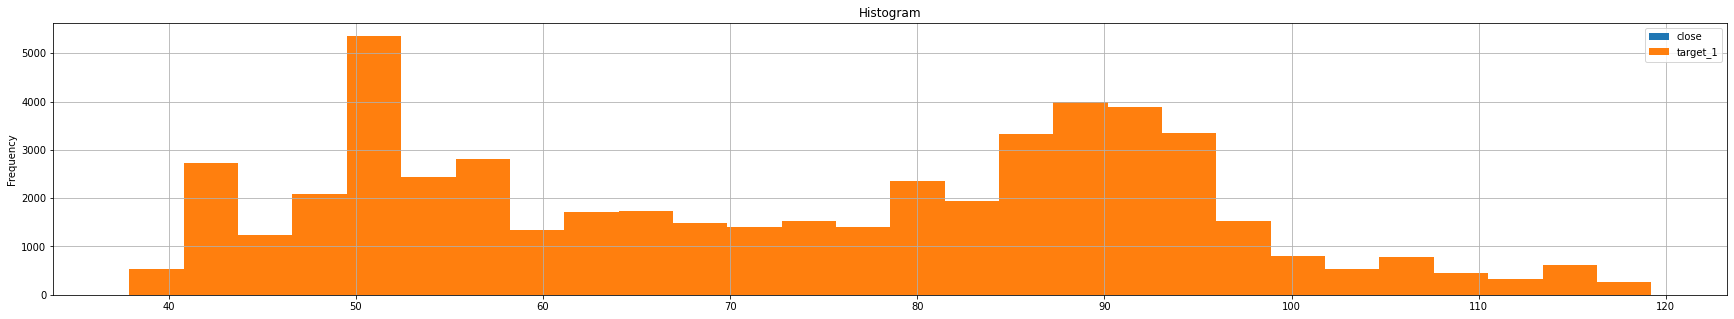

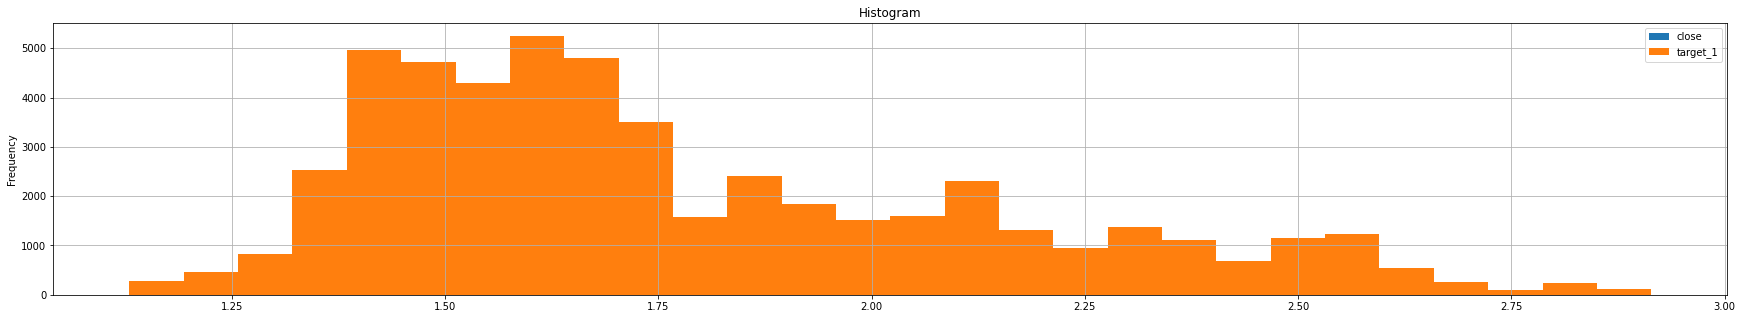

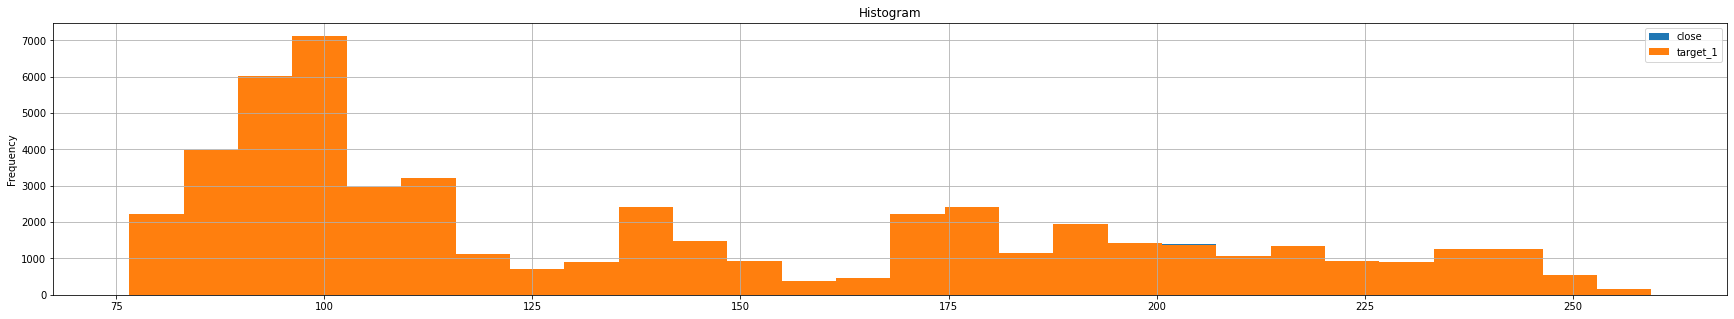

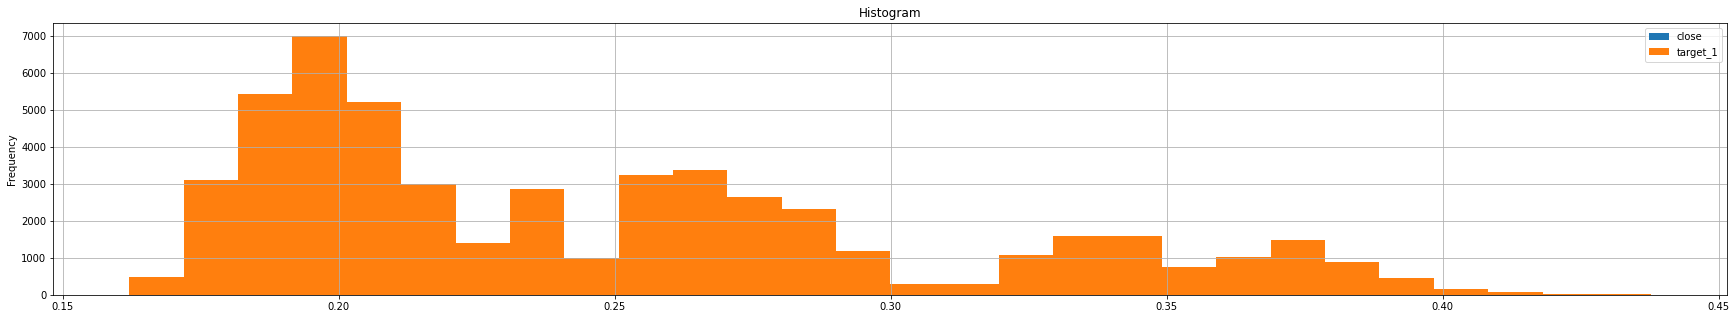

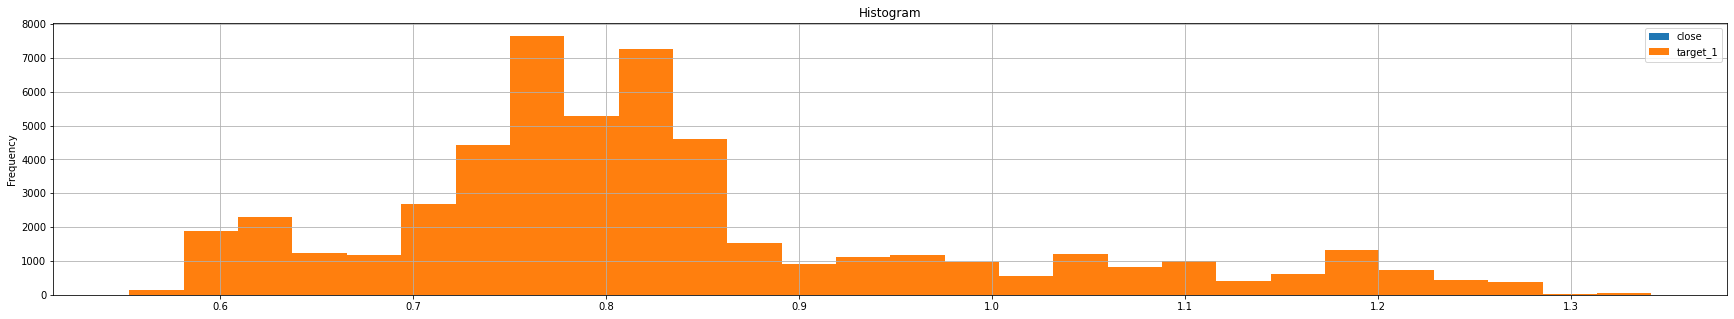

In [67]:
data.groupby('symbol')['close', 'target_1']\
    .plot.hist(bins=28, figsize=(30, 5), grid=True, legend=True, title='Histogram')

In [26]:
data.\
    groupby('symbol')['close']\
    .resample('1W')\
    .last()\
    .unstack()\
    .T\
    .corr()\
    .style\
    .background_gradient(cmap='coolwarm')

symbol,ADAUSDT,ALGOUSDT,ATOMUSDT,BCHUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,DOTUSDT,ETCUSDT,ETHUSDT,FILUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,MATICUSDT,SOLUSDT,XLMUSDT,XRPUSDT
symbol,,,,,,,,,,,,,,,,,,
ADAUSDT,1.000000,0.929398,0.487932,0.959342,0.936968,0.947575,0.979115,0.977130,0.782027,0.904563,0.956727,0.939807,0.948034,-0.402268,0.477461,0.949077,0.979723,0.875627
ALGOUSDT,0.929398,1.000000,0.453469,0.915236,0.941121,0.863222,0.884673,0.903098,0.611604,0.905807,0.927132,0.903310,0.884871,-0.375728,0.660783,0.955540,0.958563,0.758544
ATOMUSDT,0.487932,0.453469,1.000000,0.307291,0.293934,0.275488,0.396897,0.434812,0.188844,0.228050,0.310545,0.611085,0.324808,0.034587,0.525535,0.336029,0.433132,0.319818
BCHUSDT,0.959342,0.915236,0.307291,1.000000,0.965125,0.981893,0.952749,0.962396,0.833334,0.945442,0.985249,0.886252,0.976343,-0.374282,0.409302,0.955903,0.979956,0.916475
BNBUSDT,0.936968,0.941121,0.293934,0.965125,1.000000,0.945819,0.927444,0.936308,0.767649,0.983226,0.966626,0.849508,0.914749,-0.301451,0.537477,0.980704,0.964621,0.844473
BTCUSDT,0.947575,0.863222,0.275488,0.981893,0.945819,1.000000,0.946948,0.961579,0.889386,0.942679,0.963992,0.850668,0.953375,-0.342368,0.358251,0.934028,0.958118,0.942701
DOGEUSDT,0.979115,0.884673,0.396897,0.952749,0.927444,0.946948,1.000000,0.974713,0.774152,0.889386,0.957207,0.913591,0.941838,-0.444008,0.400900,0.934804,0.957667,0.886484
DOTUSDT,0.977130,0.903098,0.434812,0.962396,0.936308,0.961579,0.974713,1.000000,0.792395,0.902726,0.970762,0.924030,0.931735,-0.387071,0.417053,0.947138,0.971453,0.919599
ETCUSDT,0.782027,0.611604,0.188844,0.833334,0.767649,0.889386,0.774152,0.792395,1.000000,0.816160,0.771112,0.655859,0.789956,-0.090958,0.142286,0.743744,0.782157,0.870044


<AxesSubplot:title={'center':'BTCUSDT and ATOMUSDT'}, xlabel='time'>

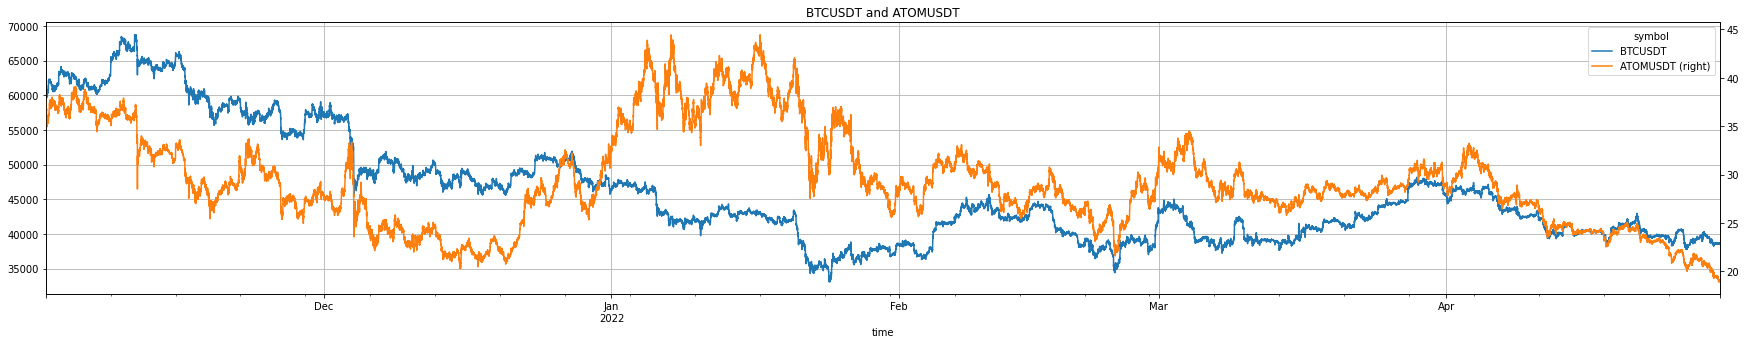

In [60]:
data.\
    groupby('symbol')['close']\
    .resample('5Min')\
    .last()\
    .loc[['BTCUSDT', 'ATOMUSDT']]\
    .unstack('symbol')\
    .plot(figsize=(30, 5), grid=True, legend=True, title='BTCUSDT and ATOMUSDT', secondary_y=['ATOMUSDT'])


<Figure size 2160x360 with 0 Axes>

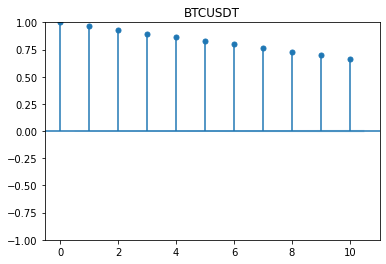

In [216]:

plt.figure(figsize=(30, 5))
plot_acf(
    data.groupby('symbol')['close']
    .resample('5Min')
    .last()
    .loc[['BTCUSDT']]
    .pct_change(-30)
    .dropna()
    .unstack('symbol'), lags=10, title='BTCUSDT', alpha=0.5
)
plt.show()


In [223]:
data.groupby('symbol')['close']\
    .resample('5Min')\
    .last()\
    .loc[['BTCUSDT']]\
    .unstack('symbol')\
    .last('6h')\
    .assign(
        target=lambda x: x.shift(-1).pct_change(),
        state=lambda x: x['target'].shift(0),
        state_=lambda x: x['target'].shift(1),
        autoccorr_1=lambda x: x['target'].autocorr(lag=1),
        autoccorr_2=lambda x: x['target'].autocorr(lag=2),
        autoccorr_3=lambda x: x['target'].autocorr(lag=3),
        autoccorr_4=lambda x: x['target'].autocorr(lag=4),
        autoccorr_5=lambda x: x['target'].autocorr(lag=5),
        autoccorr_6=lambda x: x['target'].autocorr(lag=6),
        autoccorr_7=lambda x: x['target'].autocorr(lag=7),
        autoccorr_8=lambda x: x['target'].autocorr(lag=8),
        autoccorr_9=lambda x: x['target'].autocorr(lag=9),
        autoccorr_10=lambda x: x['target'].autocorr(lag=10),
        # signal=lambda x: np.where(x['target_20'] > 0, 1, -1),
        # returns=lambda x: x['signal'] * x['target_20'].shift(-1),
        # cumsum_returns=lambda x: x['returns'].cumsum()
    )\
    .dropna()
# ['cumsum_returns'].plot(figsize=(30, 5), grid=True, legend=True, title='BTCUSDT')


symbol,BTCUSDT,target,state,state_,autoccorr_1,autoccorr_2,autoccorr_3,autoccorr_4,autoccorr_5,autoccorr_6,autoccorr_7,autoccorr_8,autoccorr_9,autoccorr_10
time,,,,,,,,,,,,,,
2022-04-30 05:30:00,38621.09,-0.000693,-0.000693,0.000336,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159
2022-04-30 05:35:00,38594.31,0.000513,0.000513,-0.000693,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159
2022-04-30 05:40:00,38614.10,0.002465,0.002465,0.000513,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159
2022-04-30 05:45:00,38709.29,0.000239,0.000239,0.002465,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159
2022-04-30 05:50:00,38718.55,0.000000,0.000000,0.000239,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 10:55:00,38572.83,-0.000164,-0.000164,-0.001173,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159
2022-04-30 11:00:00,38566.49,0.000362,0.000362,-0.000164,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159
2022-04-30 11:05:00,38580.47,0.000682,0.000682,0.000362,-0.10472,-0.227064,0.001619,-0.013189,-0.082099,-0.193491,0.155502,0.241653,-0.173632,-0.107159


<AxesSubplot:title={'center':'BTCUSDT'}, xlabel='weekday'>

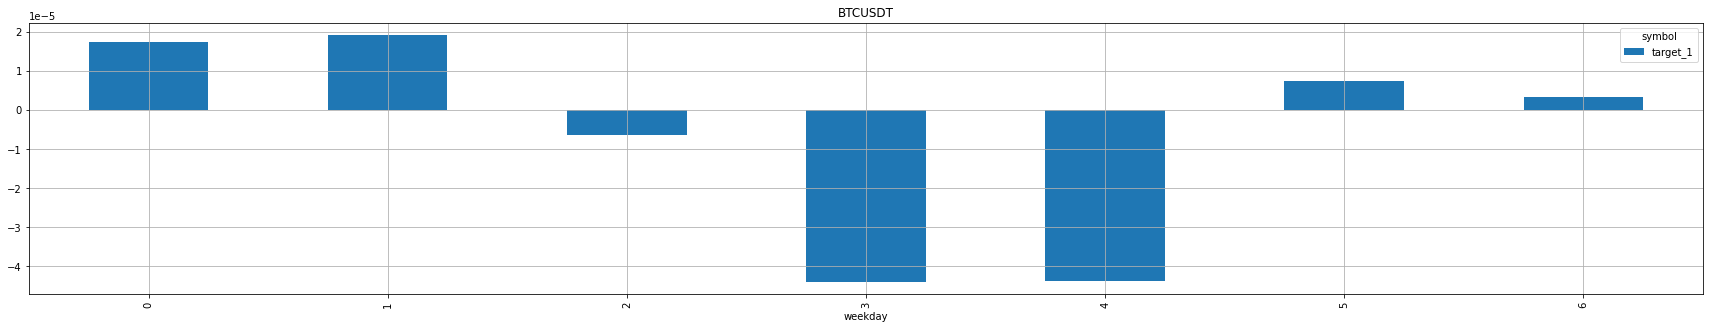

In [13]:
data.groupby('symbol')['close']\
    .resample('5Min')\
    .last()\
    .loc[['BTCUSDT']]\
    .unstack('symbol')\
    .assign(
        target_1=lambda x: x['BTCUSDT'].shift(-1).pct_change(),
        target_2=lambda x: x['BTCUSDT'].shift(-2).pct_change(),
        target_3=lambda x: x['BTCUSDT'].shift(-3).pct_change(),
        target_4=lambda x: x['BTCUSDT'].shift(-4).pct_change(),
        target_5=lambda x: x['BTCUSDT'].shift(-5).pct_change(),
        hours=lambda x: x.index.hour,
        weekday=lambda x: x.index.weekday,
    )\
    .dropna()\
    .groupby('weekday')\
    .mean()\
    .filter(like='target_1')\
    .plot.bar(figsize=(30, 5), grid=True, legend=True, title='BTCUSDT')


In [35]:
data.groupby('symbol')['close']\
    .resample('5Min')\
    .last()\
    .unstack('symbol')\
    .assign(
        close_=lambda x: print(x.stack('symbol')),
        # target_1=lambda x: x['close'].shift(-1).pct_change(),
        # target_2=lambda x: x['close'].shift(-2).pct_change(),
        # target_3=lambda x: x['close'].shift(-3).pct_change(),
        # target_4=lambda x: x['close'].shift(-4).pct_change(),
        # target_5=lambda x: x['close'].shift(-5).pct_change(),
        # hours=lambda x: x.index.hour,
        # weekday=lambda x: x.index.weekday,
)\
    .dropna()\
    # .groupby('weekday')\
# .mean()\
# .filter(like='target_1')\
# .plot.bar(figsize=(30, 5), grid=True, legend=True, title='BTCUSDT')


time                 symbol   
2021-11-01 00:05:00  ADAUSDT        1.9600
                     ALGOUSDT       1.8250
                     ATOMUSDT      36.9300
                     BCHUSDT      594.7000
                     BNBUSDT      525.2000
                                    ...   
2022-04-30 11:25:00  LINKUSDT      12.0700
                     MATICUSDT      1.1430
                     XLMUSDT        0.1811
2022-04-30 11:30:00  FILUSDT       17.7600
                     XLMUSDT        0.1811
Length: 935561, dtype: float64


symbol,ADAUSDT,ALGOUSDT,ATOMUSDT,BCHUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,DOTUSDT,ETCUSDT,ETHUSDT,FILUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,MATICUSDT,SOLUSDT,XLMUSDT,XRPUSDT,close_
time,,,,,,,,,,,,,,,,,,,
